# Breast Cancer Classification and Prediction

## Basic opreations like data import, visualization and imputation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/breast_cancer.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


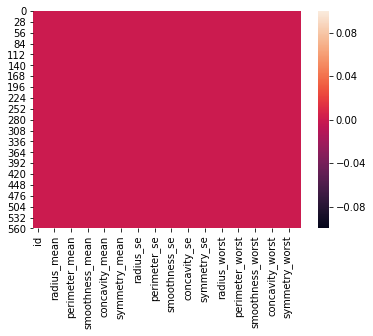

In [6]:
sns.heatmap(data.isnull())

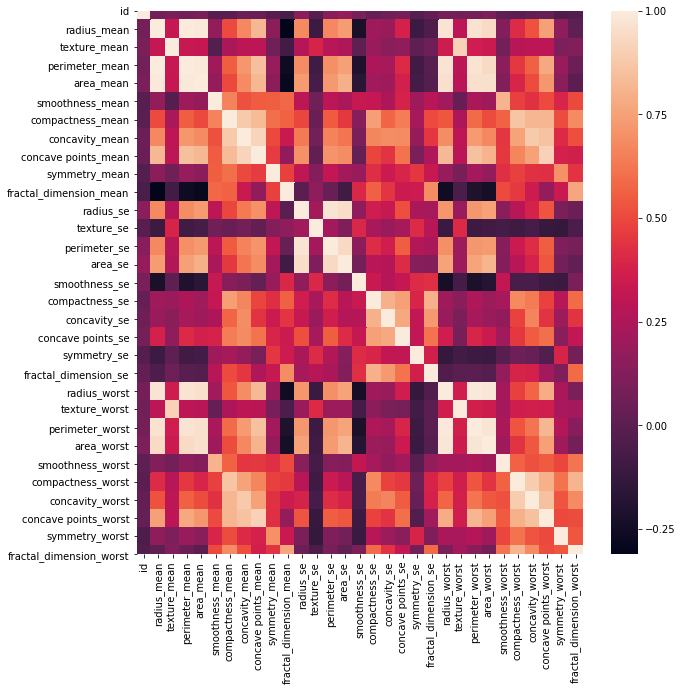

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
def diag_dummy(col):
    if col == 'B':
        return 0
    else:
        return 1

In [11]:
data['diagnosis'] = data['diagnosis'].apply(diag_dummyummy)

In [12]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.shape

(569, 32)

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(['diagnosis'],axis=1)

In [17]:
y = data['diagnosis']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [19]:
X_train.shape,y_train.shape

((455, 31), (455,))

## Importing Machine Learning and Evaluation Packages

In [20]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from xgboost import XGBClassifier

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.metrics import classification_report

## Decision Tree

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
pred1 = dt.predict(X_test)

In [28]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        65
           1       0.92      0.94      0.93        49

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## RandomForest

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
pred2 = rf.predict(X_test)

In [32]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



## Naive Bayes Gaussian NB

In [33]:
gnb = GaussianNB()

In [34]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
pred3 = gnb.predict(X_test)

In [36]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72        65
           1       0.50      0.04      0.08        49

    accuracy                           0.57       114
   macro avg       0.54      0.51      0.40       114
weighted avg       0.54      0.57      0.44       114



## AdaBoost

In [37]:
ada = AdaBoostClassifier()

In [38]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [39]:
pred4 = gnb.predict(X_test)

In [40]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72        65
           1       0.50      0.04      0.08        49

    accuracy                           0.57       114
   macro avg       0.54      0.51      0.40       114
weighted avg       0.54      0.57      0.44       114



## XGBoost

In [41]:
xg = XGBClassifier()

In [42]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
pred5 = xg.predict(X_test)

In [45]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.98      0.96      0.97        49

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Thank You